In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fancyimpute import KNN
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.model_selection import train_test_split #used to split dataset into train and test
from sklearn.metrics import mean_squared_error # used to calculate MSE
from sklearn.metrics import r2_score # used to calculate r square
from sklearn.linear_model import LinearRegression # For linear regression
from sklearn.tree import DecisionTreeRegressor # For Decision Tree
from sklearn.ensemble import RandomForestRegressor # For RandomForest
from sklearn import metrics

In [0]:
train = pd.read_csv("https://dataset-upload.s3-ap-southeast-1.amazonaws.com/Expander_data.csv")

In [99]:
train.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,04/01/20 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,04/01/20 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,04/01/20 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,04/01/20 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,04/01/20 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


**Missing value analysis**

In [100]:
train.isnull().sum()/len(train) *100

Timestamp                       0.0
Suction Pressure (psig)         0.0
Suction Temperature (F)         0.0
Total Flow (gpm)                0.0
Speed (rpm)                     0.0
By-pass Valve Position (%)      0.0
Discharge Pressure (psig)       0.0
Discharge Temperature (F)       0.0
Run Status                    100.0
dtype: float64

In [0]:
train.drop(["Run Status"], axis = 1, inplace= True)

In [0]:
train["Timestamp"] = pd.to_datetime(train.Timestamp)

In [103]:
train.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,2020-04-01 21:20:00,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
1,2020-04-01 21:20:00,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2,2020-04-01 21:20:00,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
3,2020-04-01 21:20:00,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
4,2020-04-01 21:21:00,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795


In [0]:
cnames = ["Suction Pressure (psig)", "Suction Temperature (F)", "Total Flow (gpm)", "Speed (rpm)", "By-pass Valve Position (%)", "Discharge Temperature (F)"]

**Outlier Analysis**

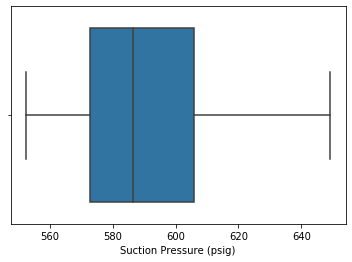

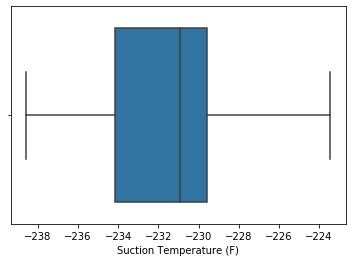

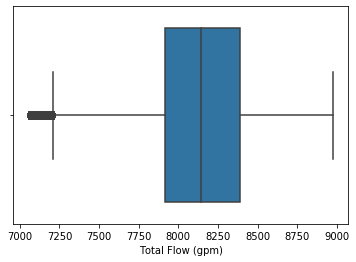

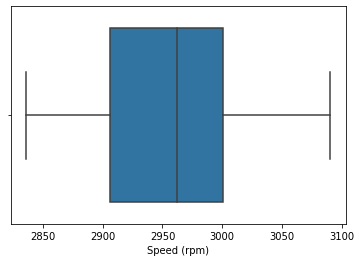

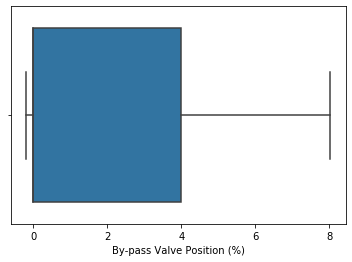

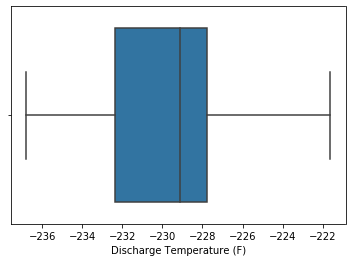

In [105]:
%matplotlib inline
for i in cnames:
  plt.figure(i)
  sns.boxplot(train[i])

**Splitting Date and Time for further analysis**

In [0]:
train['month'] = train["Timestamp"].dt.month
train['date'] = train["Timestamp"].dt.day
train['hour'] = train["Timestamp"].dt.hour
train['minute'] = train["Timestamp"].dt.minute

In [107]:
train.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),month,date,hour,minute
0,2020-04-01 21:20:00,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,4,1,21,20
1,2020-04-01 21:20:00,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,4,1,21,20
2,2020-04-01 21:20:00,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,4,1,21,20
3,2020-04-01 21:20:00,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,4,1,21,20
4,2020-04-01 21:21:00,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,4,1,21,21


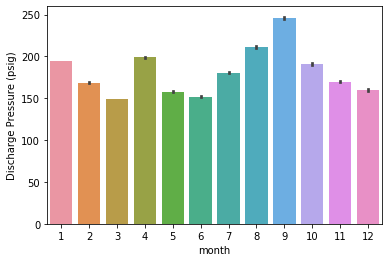

In [108]:
sns.barplot(x= train["month"], y= train['Discharge Pressure (psig)'], data = train)

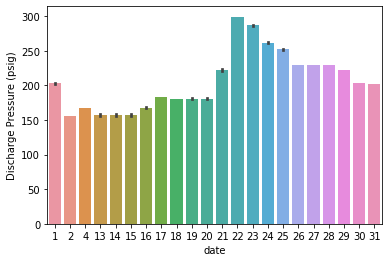

In [109]:
sns.barplot(x= train["date"], y= train['Discharge Pressure (psig)'], data = train)

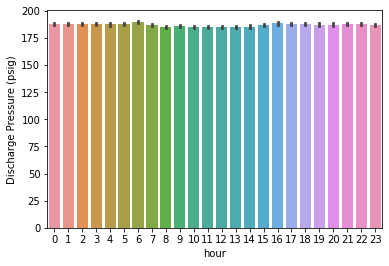

In [110]:
sns.barplot(x= train["hour"], y= train['Discharge Pressure (psig)'], data = train)

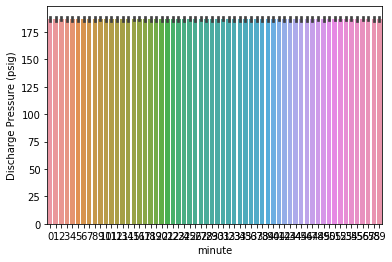

In [111]:
sns.barplot(x= train["minute"], y= train['Discharge Pressure (psig)'], data = train)

**Dropping variables after analyze**

In [0]:
train.drop(["Timestamp", "hour", "minute","date", "month"], axis = 1, inplace= True)

In [113]:
train.describe()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102


**Normalisation**

In [114]:
c_names = ["Suction Pressure (psig)",	"Suction Temperature (F)",	"Total Flow (gpm)",	"Speed (rpm)",	"By-pass Valve Position (%)",	"Discharge Temperature (F)"]
for i in c_names:
  print (i)
  train[i]= (train[i] - train[i].min())/(train[i].max() - train[i].min())

Suction Pressure (psig)
Suction Temperature (F)
Total Flow (gpm)
Speed (rpm)
By-pass Valve Position (%)
Discharge Temperature (F)


In [0]:
X = train.drop('Discharge Pressure (psig)',axis=1).values
Y = train['Discharge Pressure (psig)'].values

In [116]:
inp_df = pd.DataFrame(X, columns=c_names)
inp_df.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Temperature (F)
0,0.451260,0.604314,0.453023,0.642770,0.753647,0.605415
1,0.458878,0.537205,0.536418,0.604656,0.753647,0.536056
2,0.455062,0.597143,0.440718,0.669951,0.753647,0.596146
3,0.528405,0.546725,0.487403,0.686272,0.753647,0.547868
4,0.444096,0.582454,0.424773,0.592713,0.753647,0.581904


**Feature Selection using VIF and Correlation analysis**

In [117]:
import statsmodels.api as sm
for i in range(0, len(c_names)):
    y = inp_df.loc[:, inp_df.columns == c_names[i]]
    x = inp_df.loc[:, inp_df.columns != c_names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            c_names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            c_names[i], vif)
        )

R Square value of Suction Pressure (psig) column is 0.96 keeping all other columns as features
Variance Inflation Factor of Suction Pressure (psig) column is 23.71 

R Square value of Suction Temperature (F) column is 1.0 keeping all other columns as features
Variance Inflation Factor of Suction Temperature (F) column is 348796.75 

R Square value of Total Flow (gpm) column is 0.9 keeping all other columns as features
Variance Inflation Factor of Total Flow (gpm) column is 10.13 

R Square value of Speed (rpm) column is 0.91 keeping all other columns as features
Variance Inflation Factor of Speed (rpm) column is 11.39 

R Square value of By-pass Valve Position (%) column is 0.73 keeping all other columns as features
Variance Inflation Factor of By-pass Valve Position (%) column is 3.68 

R Square value of Discharge Temperature (F) column is 1.0 keeping all other columns as features
Variance Inflation Factor of Discharge Temperature (F) column is 349700.14 



In [118]:
c_names = ["Suction Pressure (psig)", "Total Flow (gpm)",	"By-pass Valve Position (%)", "By-pass Valve Position (%)", "Speed (rpm)"]
for i in range(0, len(c_names)):
    y = inp_df.loc[:, inp_df.columns == c_names[i]]
    x = inp_df.loc[:, inp_df.columns != c_names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            c_names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            c_names[i], vif)
        )

R Square value of Suction Pressure (psig) column is 0.96 keeping all other columns as features
Variance Inflation Factor of Suction Pressure (psig) column is 23.71 

R Square value of Total Flow (gpm) column is 0.9 keeping all other columns as features
Variance Inflation Factor of Total Flow (gpm) column is 10.13 

R Square value of By-pass Valve Position (%) column is 0.73 keeping all other columns as features
Variance Inflation Factor of By-pass Valve Position (%) column is 3.68 

R Square value of By-pass Valve Position (%) column is 0.73 keeping all other columns as features
Variance Inflation Factor of By-pass Valve Position (%) column is 3.68 

R Square value of Speed (rpm) column is 0.91 keeping all other columns as features
Variance Inflation Factor of Speed (rpm) column is 11.39 



In [119]:
c_names = ["Total Flow (gpm)",	"By-pass Valve Position (%)", "By-pass Valve Position (%)", "Speed (rpm)"]
for i in range(0, len(c_names)):
    y = inp_df.loc[:, inp_df.columns == c_names[i]]
    x = inp_df.loc[:, inp_df.columns != c_names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            c_names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            c_names[i], vif)
        )

R Square value of Total Flow (gpm) column is 0.9 keeping all other columns as features
Variance Inflation Factor of Total Flow (gpm) column is 10.13 

R Square value of By-pass Valve Position (%) column is 0.73 keeping all other columns as features
Variance Inflation Factor of By-pass Valve Position (%) column is 3.68 

R Square value of By-pass Valve Position (%) column is 0.73 keeping all other columns as features
Variance Inflation Factor of By-pass Valve Position (%) column is 3.68 

R Square value of Speed (rpm) column is 0.91 keeping all other columns as features
Variance Inflation Factor of Speed (rpm) column is 11.39 



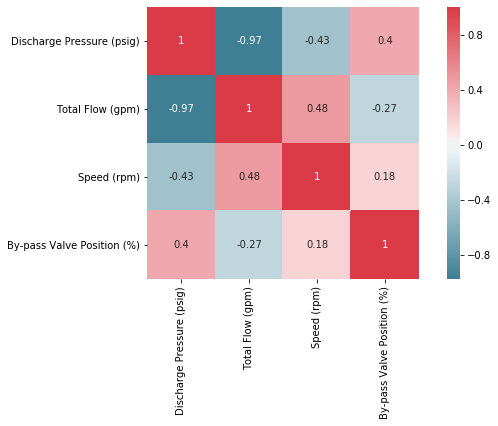

In [120]:
cnames = ["Discharge Pressure (psig)", "Total Flow (gpm)", "Speed (rpm)",	"By-pass Valve Position (%)"] 
df_corr = train.loc[:,cnames]
f , ax = plt.subplots(figsize = (10, 5))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [0]:
train =df_corr

**Splitting into test and train data**

In [122]:
from sklearn.model_selection import train_test_split
X = train.drop('Discharge Pressure (psig)',axis=1).values
y = train['Discharge Pressure (psig)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=69)
print(train.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(296450, 4) (207515, 3) (88935, 3) (207515,) (88935,)


**Building different models**

In [123]:
# Building LinearRegression Model on training Data
lm = LinearRegression()
lm.fit(X_train,y_train)
#lets print the intercept 
print("LM Intercept : ", lm.intercept_)
predictions_LR =lm.predict(X_test)
RMSE_LR = np.sqrt(metrics.mean_squared_error(y_test,predictions_LR))
r2_LR = metrics.r2_score(y_test,predictions_LR)
MAE_LR = metrics.mean_absolute_error(y_test,predictions_LR)
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))
    return mape
MAPE_LR = MAPE(y_test,predictions_LR)
LR_Results = {'RMSE_LR':RMSE_LR,'r2_LR':r2_LR,'MAE_LR':MAE_LR,'MAPE_LR':MAPE_LR}
print(LR_Results)

LM Intercept :  320.3868979314372
{'RMSE_LR': 10.22527008702024, 'r2_LR': 0.9668727102182978, 'MAE_LR': 8.098275786674519, 'MAPE_LR': 0.04568845111957758}


In [124]:
# Building Decision Tree Model on training Data
fit_DT  = DecisionTreeRegressor(max_depth = 4).fit(X_train, y_train)
# Apply model on splitted test data
predictions_DT = fit_DT.predict(X_test)
MAE_DT = metrics.mean_absolute_error(y_test,predictions_DT)
RMSE_DT = np.sqrt(metrics.mean_squared_error(y_test,predictions_DT))
r2_DT = metrics.r2_score(y_test,predictions_DT)
MAE_DT = metrics.mean_absolute_error(y_test,predictions_DT)
MAPE_DT = MAPE(y_test,predictions_DT)
DT_Results = {'RMSE_DT':RMSE_DT,'r2_DT':r2_DT,'MAE_DT':MAE_DT,'MAPE_DT':MAPE_DT}
print(DT_Results)

{'RMSE_DT': 9.338447184369738, 'r2_DT': 0.9723696959387982, 'MAE_DT': 7.070639457241193, 'MAPE_DT': 0.0402757201980507}


# **Finalized Model**

In [0]:
# Building Random Forest Model on training data
RFModel = RandomForestRegressor(n_estimators = 200).fit(X_train, y_train)
# Apply model on splitting test data
predictions_RF = RFModel.predict(X_test)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test,predictions_RF))
r2_RF = metrics.r2_score(y_test,predictions_RF)
MAE_RF = metrics.mean_absolute_error(y_test,predictions_RF)
MAPE_RF = MAPE(y_test,predictions_RF) 
RF_Results = {'RMSE_RF':RMSE_RF,'r2_RF':r2_RF,'MAE_RF':MAE_RF,'MAPE_RF':MAPE_RF}
print(RF_Results)

In [0]:
## Error Metrics for All the above 3 models
Error_Metrics = {'RMSE':[RMSE_LR,RMSE_DT,RMSE_RF],
                  'r2':[r2_LR,r2_DT,r2_RF],
                     'MAE':[MAE_LR,MAE_DT,MAE_RF],
                   'MAPE':[MAPE_LR,MAPE_DT,MAPE_RF]}
                 

metrics_result =pd.DataFrame(Error_Metrics,index = ['Linear Regression', 'Decision Tree', 'Random Forest']) 

print(metrics_result)